In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/fake_reviews _dataset.csv')

#  first few rows
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [ ]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None


In [ ]:
# Keep only 'label' and 'text_' columns
df = df[['label', 'text_']]

df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  object
 1   text_   40432 non-null  object
dtypes: object(2)
memory usage: 631.9+ KB
None


In [ ]:
# Check for null values
print(df.isnull().sum())

label    0
text_    0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 20


In [ ]:
# To remove duplicates
df = df.drop_duplicates(keep='first')

#  after removal
print(f"After removing duplicates, dataset shape: {df.shape}")

After removing duplicates, dataset shape: (40412, 2)


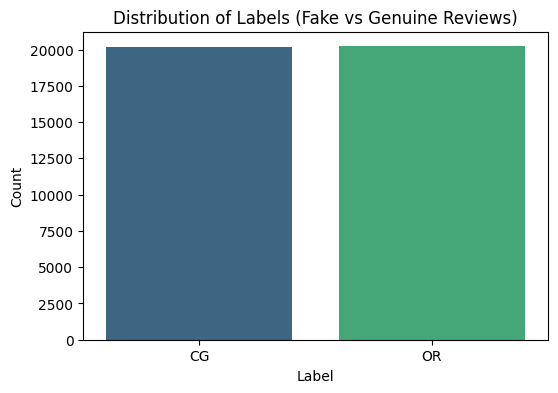

In [ ]:
# Count plot of labels
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Labels (Fake vs Genuine Reviews)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

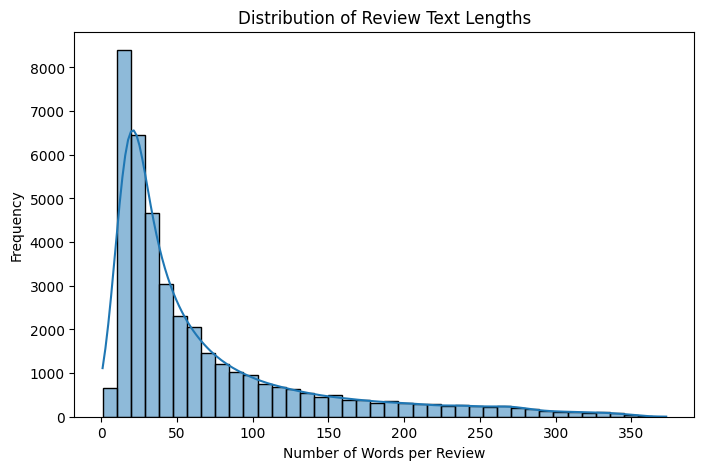

In [ ]:
# Create a new column for text length
df['text_length'] = df['text_'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=40, kde=True)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Number of Words per Review')
plt.ylabel('Frequency')
plt.show()

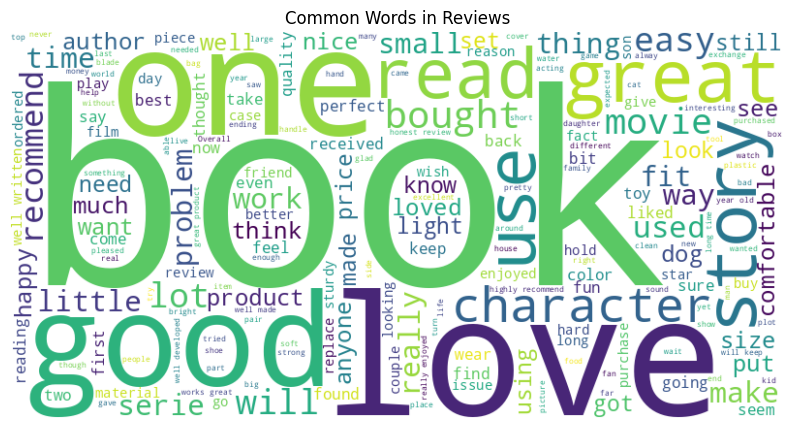

In [ ]:
from wordcloud import WordCloud

# Combine all text
all_text = " ".join(df['text_'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Reviews')
plt.show()

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove digits and punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to a single string
    return " ".join(cleaned)

# Apply the function to your dataset
df['clean_text'] = df['text_'].apply(clean_text)

#  results
df[['text_', 'clean_text']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text_,clean_text
0,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love pretty
1,"love it, a great upgrade from the original. I...",love great upgrade original mine couple year
2,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow
3,"Missing information on how to use it, but it i...",missing information use great product price
4,Very nice set. Good quality. We have had the s...,nice set good quality set two month


In [ ]:
df.head()

,label,text_,text_length,clean_text
0,CG,"Love this! Well made, sturdy, and very comfor...",12,love well made sturdy comfortable love pretty
1,CG,"love it, a great upgrade from the original. I...",16,love great upgrade original mine couple year
2,CG,This pillow saved my back. I love the look and...,14,pillow saved back love look feel pillow
3,CG,"Missing information on how to use it, but it i...",17,missing information use great product price
4,CG,Very nice set. Good quality. We have had the s...,18,nice set good quality set two month


#Building the DistilBert with GRU

In [ ]:
import torch
import tensorflow as tf
from tqdm import tqdm
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from sklearn.model_selection import train_test_split

X=df['clean_text']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32329,), (8083,), (32329,), (8083,))

In [ ]:
#  DistilBERT model & tokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)
bert_model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
#  Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)
print("Number of classes:", num_classes)

Number of classes: 2


In [ ]:
# Generate DistilBERT embeddings

def get_distilbert_embeddings(texts, batch_size=32, max_len=128):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Embedding batches"):
        batch_texts = texts[i:i+batch_size].tolist()

        inputs = tokenizer(
            batch_texts,
            return_tensors='pt',
            max_length=max_len,
            padding='max_length',
            truncation=True
        ).to(device)

        with torch.no_grad():
            outputs = bert_model(**inputs)
            emb = outputs.last_hidden_state.mean(dim=1)
            all_embeddings.append(emb.cpu().numpy())

        del inputs, outputs, emb
        torch.cuda.empty_cache()

    return np.vstack(all_embeddings)

print("Generating DistilBERT embeddings...")
X_train_emb = get_distilbert_embeddings(X_train, batch_size=32, max_len=128)
X_test_emb = get_distilbert_embeddings(X_test, batch_size=32, max_len=128)

# Save to disk
np.save('X_train_dist_albert.npy', X_train_emb)
np.save('X_test_dist_albert.npy', X_test_emb)

# Load
X_train_emb = np.load('X_train_dist_albert.npy')
X_test_emb = np.load('X_test_dist_albert.npy')

print("Embedding shapes:")
print("X_train_emb:", X_train_emb.shape)
print("X_test_emb:", X_test_emb.shape)

Generating DistilBERT embeddings...


Embedding batches: 100%|██████████| 253/253 [00:30<00:00,  8.18it/s]


Embedding shapes:
X_train_emb: (32329, 768)
X_test_emb: (8083, 768)


Epoch 1/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6900 - loss: 0.5793 - val_accuracy: 0.8086 - val_loss: 0.4018 - learning_rate: 3.0000e-04
Epoch 2/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7868 - loss: 0.4316 - val_accuracy: 0.8294 - val_loss: 0.3654 - learning_rate: 3.0000e-04
Epoch 3/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8077 - loss: 0.4038 - val_accuracy: 0.8287 - val_loss: 0.3597 - learning_rate: 3.0000e-04
Epoch 4/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8200 - loss: 0.3751 - val_accuracy: 0.8404 - val_loss: 0.3442 - learning_rate: 3.0000e-04
Epoch 5/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8215 - loss: 0.3752 - val_accuracy: 0.8395 - val_loss: 0.3391 - learning_rate: 3.0000e-04
Epoch 6/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8308 - loss: 0.3595 - val_accuracy: 0.8451 - val_loss: 0.3243 - learning_rate: 3.0000e-04
Epoch 7/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy:

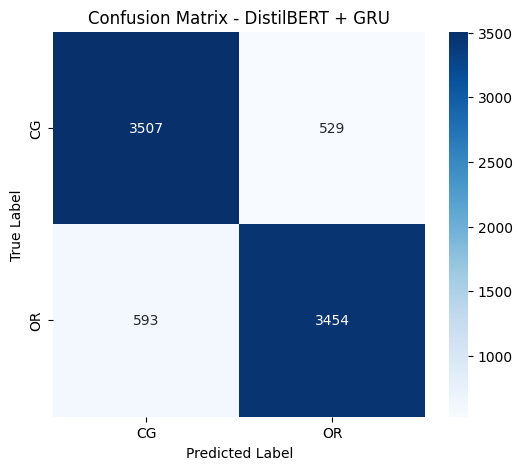

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Build GRU Model
model = Sequential([
    Input(shape=(768,)),
    Reshape((1, 768)),
    GRU(128, return_sequences=False),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train model
history = model.fit(
    X_train_emb, y_train_enc,
    validation_data=(X_test_emb, y_test_enc),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1)

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test_emb, y_test_enc, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred_prob = model.predict(X_test_emb)
y_pred = (y_pred_prob > 0.5).astype(int)

# PERFORMANCE METRICS IN PERCENT
accuracy = accuracy_score(y_test_enc, y_pred) * 100
precision = precision_score(y_test_enc, y_pred, average='weighted') * 100
recall = recall_score(y_test_enc, y_pred, average='weighted') * 100
f1 = f1_score(y_test_enc, y_pred, average='weighted') * 100

print("\n--- GRU Model Performance (DistilBERT Embeddings) ---")
print(f"Accuracy : {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall   : {recall:.2f}%")
print(f"F1 Score : {f1:.2f}%")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - DistilBERT + GRU')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

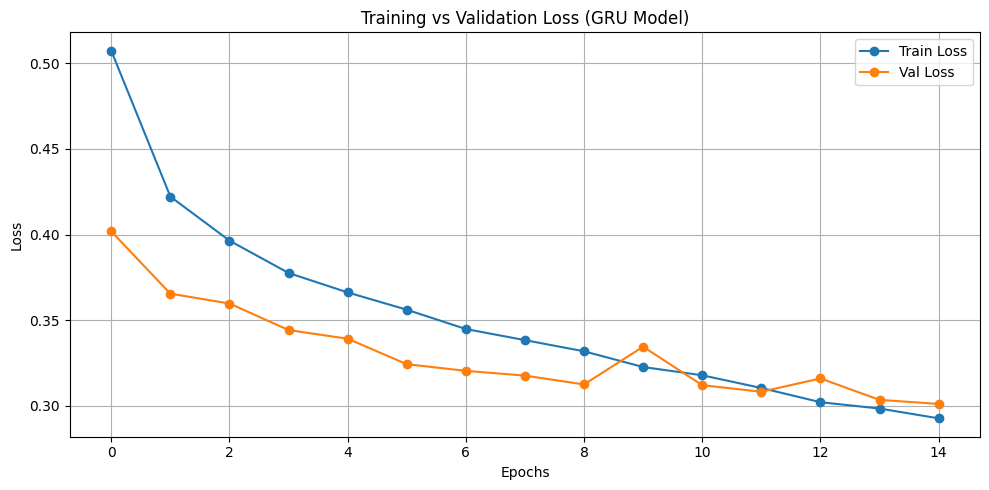

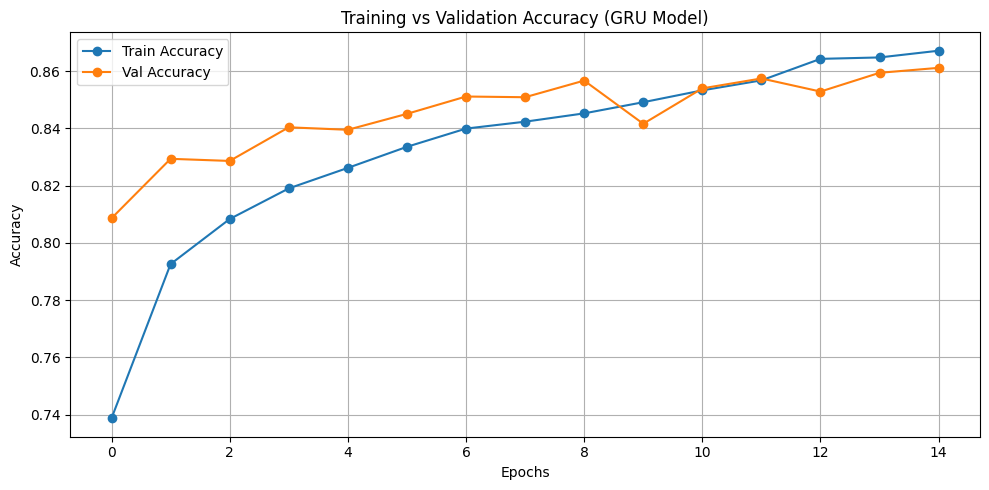

In [ ]:
# Plot Training Curves (Loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("Training vs Validation Loss (GRU Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training Curves (Accuracy)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title("Training vs Validation Accuracy (GRU Model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Decision Tree

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Hyperparameters: {'max_depth': 100}

Accuracy: 74.18%
Precision: 74.19%
Recall: 74.18%
F1 Score: 74.18%

Classification Report:
              precision    recall  f1-score   support

          CG       0.75      0.73      0.74      4036
          OR       0.74      0.75      0.75      4047

    accuracy                           0.74      8083
   macro avg       0.74      0.74      0.74      8083
weighted avg       0.74      0.74      0.74      8083



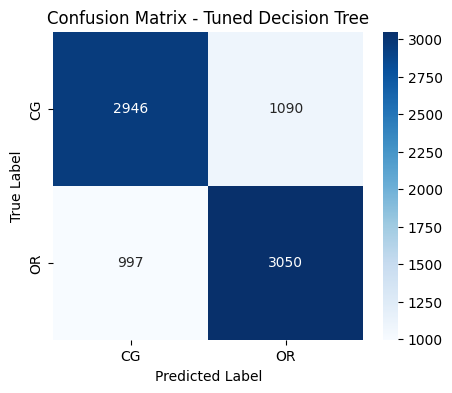

In [ ]:
# Decision Tree with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {'max_depth': [10, 20, 30, 40,50,70,100,200]}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_tfidf, y_train_enc)

# Print the best parameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Predict on test data
y_pred = best_dt.predict(X_test_tfidf)

#  METRICS IN PERCENT
accuracy = accuracy_score(y_test_enc, y_pred) * 100
precision = precision_score(y_test_enc, y_pred, average='weighted') * 100
recall = recall_score(y_test_enc, y_pred, average='weighted') * 100
f1 = f1_score(y_test_enc, y_pred, average='weighted') * 100

print(f"\nAccuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

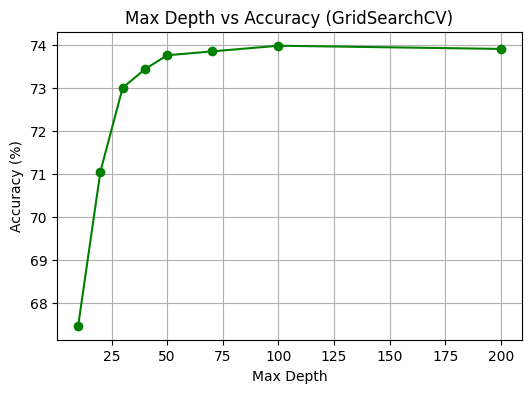

In [ ]:
import pandas as pd

# Extract all CV
cv_results = pd.DataFrame(grid_search.cv_results_)

# Filter only max_depth and mean_test_score
depth_accuracy = cv_results[['param_max_depth', 'mean_test_score']]

# Drop duplicates
depth_accuracy = depth_accuracy.groupby('param_max_depth').mean().reset_index()

# Convert accuracy to percentage
depth_accuracy['mean_test_score'] = depth_accuracy['mean_test_score'] * 100

# Plot max_depth vs accuracy
plt.figure(figsize=(6,4))
plt.plot(depth_accuracy['param_max_depth'], depth_accuracy['mean_test_score'],
         marker='o', linestyle='-', color='green')

plt.title("Max Depth vs Accuracy (GridSearchCV)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

RandomForest

Fitting 3 folds for each of 7 candidates, totalling 21 fits

Best Hyperparameters: {'n_estimators': 1000}

Accuracy: 77.32%
Precision: 77.42%
Recall: 77.32%
F1 Score: 77.30%

Classification Report:
              precision    recall  f1-score   support

          CG       0.76      0.80      0.78      4036
          OR       0.79      0.74      0.77      4047

    accuracy                           0.77      8083
   macro avg       0.77      0.77      0.77      8083
weighted avg       0.77      0.77      0.77      8083



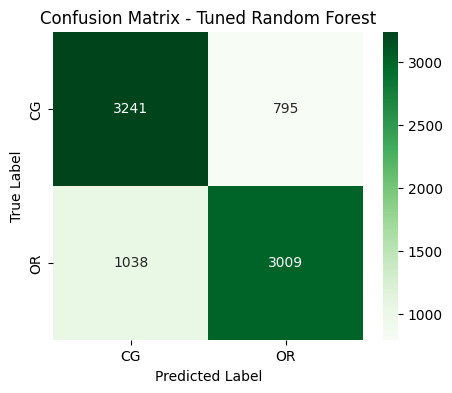

In [ ]:
# Random Forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42, max_depth=2)

# Define hyperparameters
param_grid = {'n_estimators': [50,100, 200,300,500,700,1000]}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy')

# Fit the model on training data
grid_search_rf.fit(X_train_tfidf, y_train_enc)

# Print best hyperparameters
print("\nBest Hyperparameters:", grid_search_rf.best_params_)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Predict on test data
y_pred_rf = best_rf.predict(X_test_tfidf)

# METRICS IN PERCENT
accuracy_rf = accuracy_score(y_test_enc, y_pred_rf) * 100
precision_rf = precision_score(y_test_enc, y_pred_rf, average='weighted') * 100
recall_rf = recall_score(y_test_enc, y_pred_rf, average='weighted') * 100
f1_rf = f1_score(y_test_enc, y_pred_rf, average='weighted') * 100

# Print metrics
print(f"\nAccuracy: {accuracy_rf:.2f}%")
print(f"Precision: {precision_rf:.2f}%")
print(f"Recall: {recall_rf:.2f}%")
print(f"F1 Score: {f1_rf:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

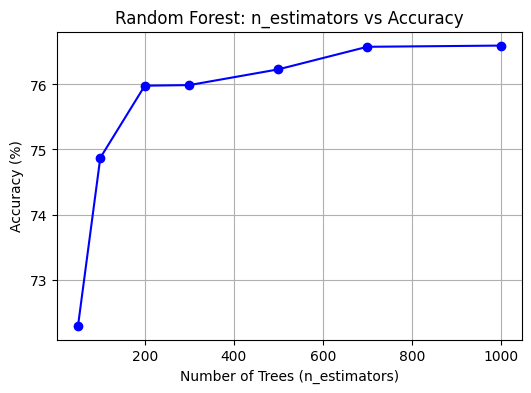

In [ ]:
# Convert GridSearchCV results to DataFrame
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Extract only n_estimators + mean accuracy
n_est_acc = cv_results_rf[['param_n_estimators', 'mean_test_score']]

# Convert accuracy to %
n_est_acc['mean_test_score'] = n_est_acc['mean_test_score'] * 100

# Plot accuracy vs n_estimators
plt.figure(figsize=(6,4))
plt.plot(n_est_acc['param_n_estimators'], n_est_acc['mean_test_score'],
         marker='o', linestyle='-', color='blue')

plt.title("Random Forest: n_estimators vs Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

XGBoost

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best Hyperparameters: {'n_estimators': 150}

Accuracy: 82.15%
Precision: 82.21%
Recall: 82.15%
F1 Score: 82.14%

Classification Report:
              precision    recall  f1-score   support

          CG       0.84      0.80      0.82      4036
          OR       0.81      0.84      0.83      4047

    accuracy                           0.82      8083
   macro avg       0.82      0.82      0.82      8083
weighted avg       0.82      0.82      0.82      8083



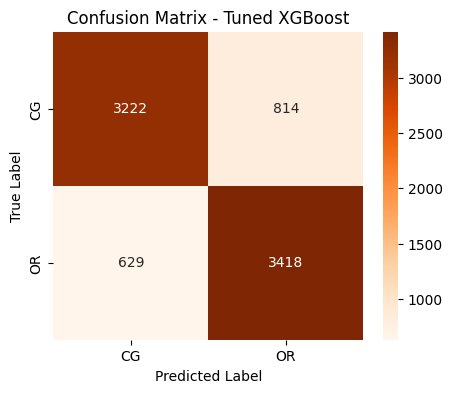

In [ ]:
# XGBoost Model with Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Initialize XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    max_depth=2,
    use_label_encoder=False)

# Hyperparameter grid
param_grid = {'n_estimators': [30, 50, 100, 150]}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy')

# Fit the model
grid_search_xgb.fit(X_train_tfidf, y_train_enc)

# Print best parameters
print("\nBest Hyperparameters:", grid_search_xgb.best_params_)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test_tfidf)

#  METRICS IN PERCENT
accuracy_xgb = accuracy_score(y_test_enc, y_pred_xgb) * 100
precision_xgb = precision_score(y_test_enc, y_pred_xgb, average='weighted') * 100
recall_xgb = recall_score(y_test_enc, y_pred_xgb, average='weighted') * 100
f1_xgb = f1_score(y_test_enc, y_pred_xgb, average='weighted') * 100

# Print metrics
print(f"\nAccuracy: {accuracy_xgb:.2f}%")
print(f"Precision: {precision_xgb:.2f}%")
print(f"Recall: {recall_xgb:.2f}%")
print(f"F1 Score: {f1_xgb:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_enc, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# GRU

X_train shape: (32329, 100)
X_test shape: (8083, 100)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_46 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_47 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5059 - loss: 0.7029 - val_accuracy: 0.5060 - val_loss: 0.6919
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5165 - loss: 0.6849 - val_accuracy: 0.5390 - val_loss: 0.6885
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5316 - loss: 0.6730 - val_accuracy: 0.4793 - val_loss: 0.6901
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5076 - loss: 0.6954 - val_accuracy: 0.5336 - val_loss: 0.6758
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5567 - loss: 0.6757 - val_accuracy: 0.5912 - val_loss: 0.6943
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5409 - loss: 0.6897 - val_accuracy: 0.5773 - val_loss: 0.6778
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5459 - loss: 0.6844 - val_accuracy: 0.5806 - val_loss: 0.6784
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5578 - loss: 0.6808 - val_accuracy: 0.5848 - v

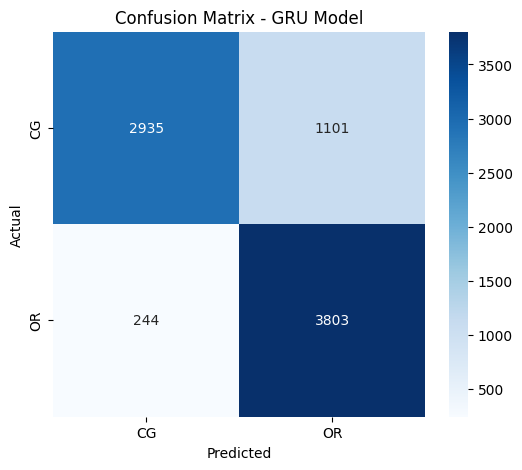

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Tokenize and pad text
vocab_size = 20000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print("X_train shape:", X_train_pad.shape)
print("X_test shape:", X_test_pad.shape)

# Build GRU Model
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    GRU(64, return_sequences=True),
    Dropout(0.6),
    BatchNormalization(),
    GRU(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train_enc,
    validation_split=0.2,
    epochs=10,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc, verbose=1)

# Predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

#  METRICS IN PERCENT
accuracy = accuracy_score(y_test_enc, y_pred) * 100
precision = precision_score(y_test_enc, y_pred, average='weighted') * 100
recall = recall_score(y_test_enc, y_pred, average='weighted') * 100
f1 = f1_score(y_test_enc, y_pred, average='weighted') * 100

# Print Metrics
print("\n--- GRU Model Performance ---")
print(f"Accuracy : {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall   : {recall:.2f}%")
print(f"F1 Score : {f1:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GRU Model')
plt.show()